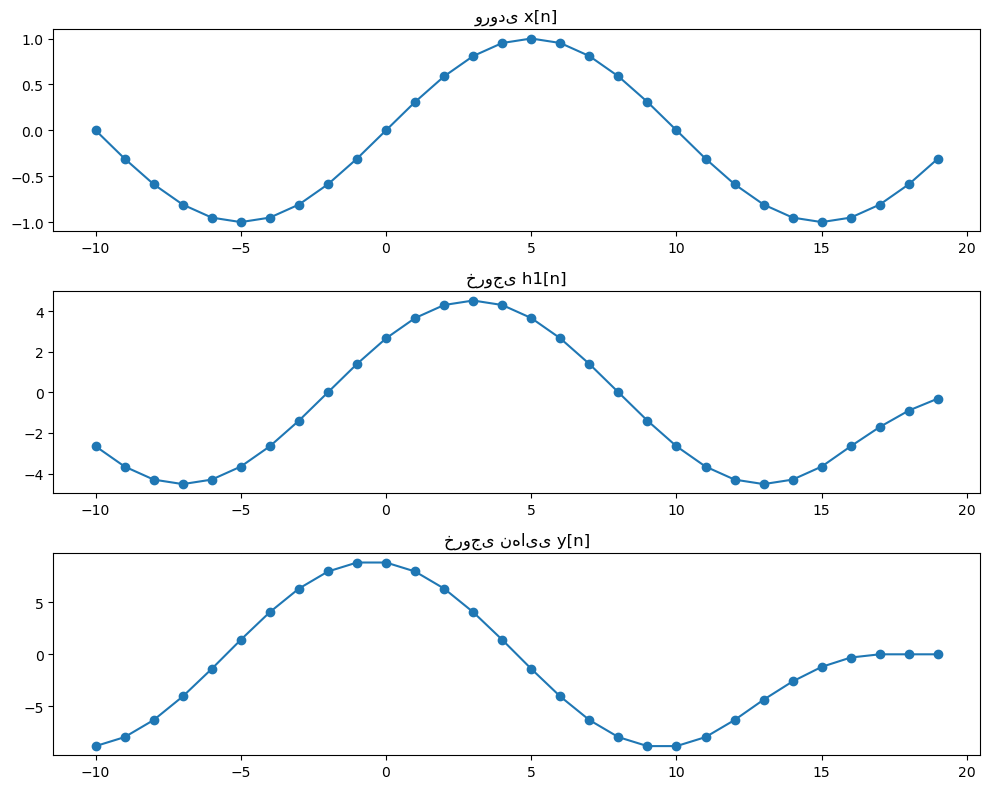

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def u(n):
    return np.where(n >= 0, 1, 0)

def h2(n):
    return u(n) - u(n-2)

def h1(n):
    return np.where((n >= 0) & (n <= 4), 1, 0)  # یک فیلتر ساده برای مثال

def x(n):
    return np.sin(0.1 * np.pi * n)  # برای مثال، یک سیگنال سینوسی

n = np.arange(-10, 20)

h1_n = h1(n)
h2_n = h2(n)

h1_output = np.convolve(x(n), h1_n, mode='same')

y_n = np.convolve(h1_output, h2_n, mode='same')

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(n, x(n), marker='o')
plt.title("ورودی x[n]")

plt.subplot(3, 1, 2)
plt.plot(n, h1_output, marker='o')
plt.title("خروجی h1[n]")

plt.subplot(3, 1, 3)
plt.plot(n, y_n, marker='o')
plt.title("خروجی نهایی y[n]")

plt.tight_layout()
plt.show()


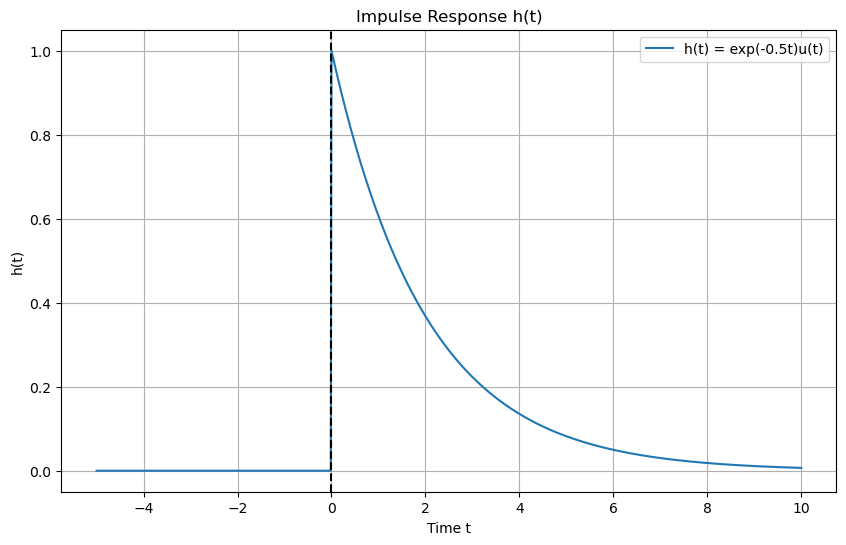

Causal: Yes
Memory: Yes
Stable: Yes


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

a = -0.5  
t = np.linspace(-5, 10, 1000)  

h_t = np.exp(a * t) * (t >= 0)  # u(t) is 1 for t >= 0

plt.figure(figsize=(10, 6))
plt.plot(t, h_t, label=f'h(t) = exp({a}t)u(t)')
plt.title("Impulse Response h(t)")
plt.xlabel("Time t")
plt.ylabel("h(t)")
plt.grid(True)
plt.axvline(0, color='k', linestyle='--')  # Show t=0 line
plt.legend()
plt.show()

is_causal = np.all(h_t[t < 0] == 0)  # h(t) is zero for t < 0
print(f'Causal: {"Yes" if is_causal else "No"}')


has_memory = "Yes" if a != 0 else "No"
print(f'Memory: {has_memory}')


stable = np.trapz(np.abs(h_t), t) < np.inf  # Integrating over time to check
print(f'Stable: {"Yes" if stable else "No"}')


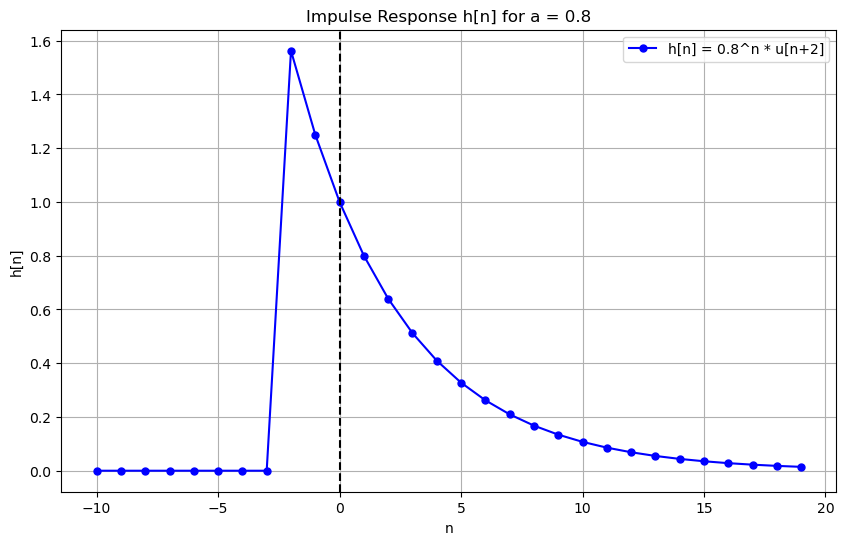

Causal: No
Memory: Yes
Stable: Yes


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 0.8  # You can change this value to see the effect of different 'a'
n = np.arange(-10, 20, 1)  # Range of n

# Define h[n] = a^n * u[n+2], where u[n+2] is 1 for n >= -2
h_n = (a ** n) * (n >= -2)  # u[n+2] is 1 for n >= -2

# Plot h[n] using plot instead of stem
plt.figure(figsize=(10, 6))
plt.plot(n, h_n, 'bo-', label=f'h[n] = {a}^n * u[n+2]', markersize=5)
plt.title(f"Impulse Response h[n] for a = {a}")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.axvline(0, color='k', linestyle='--')  # Show n=0 line
plt.legend()
plt.show()

# Causality
is_causal = np.all(h_n[n < 0] == 0)  # h[n] is zero for n < 0
print(f'Causal: {"Yes" if is_causal else "No"}')

# Memory
# If h[n] depends on past or future values, it has memory
has_memory = "Yes" if a != 0 else "No"
print(f'Memory: {has_memory}')

# Stability
# A system is stable if the sum of the absolute values of h[n] is finite
stable = np.sum(np.abs(h_n)) < np.inf  # Summing the absolute values to check
print(f'Stable: {"Yes" if stable else "No"}')
